<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>










# Spatial and Multivariare analysis

## Getting Ready


Here, I will use data from Peru again:

In [42]:
import geopandas as gpd

peruDataLink="https://github.com/CienciaDeDatosEspacial/dataSets/raw/refs/heads/main/PERU/PeruMaps.gpkg"
DisMap=gpd.read_file(peruDataLink,layer='good_geom')

## Mining several variables

Let me select some columns:

In [43]:
selected_variables = ['Educ_sec_comp2019_pct',
                     'NBI2017_pct', 
                     'Viv_sin_serv_hig2017_pct']


<Axes: >

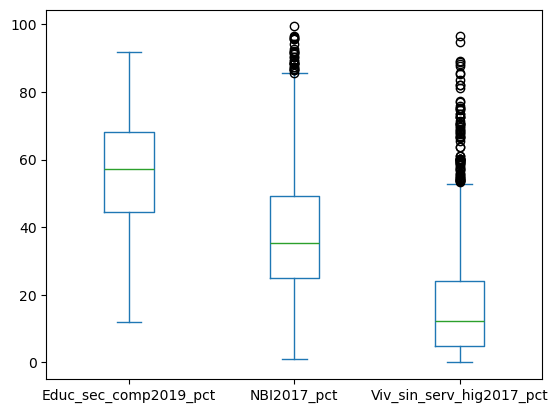

In [44]:
# see distribution
DisMap[selected_variables].plot(kind='box')

Let me check their monotony:

In [45]:
DisMap[selected_variables].corr()

Educ_sec_comp2019_pct  NBI2017_pct  \
Educ_sec_comp2019_pct                  1.000000    -0.429787   
NBI2017_pct                           -0.429787     1.000000   
Viv_sin_serv_hig2017_pct              -0.200867     0.662548   

                          Viv_sin_serv_hig2017_pct  
Educ_sec_comp2019_pct                    -0.200867  
NBI2017_pct                               0.662548  
Viv_sin_serv_hig2017_pct                  1.000000

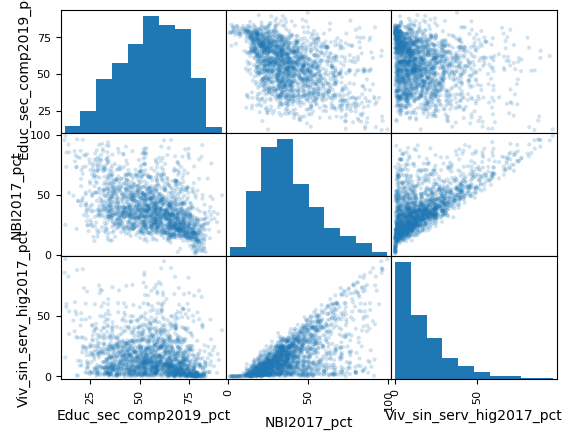

In [46]:
import pandas as pd
pd.plotting.scatter_matrix(DisMap[selected_variables], alpha=0.2);

Here, we can reverse the values of *Educ_sec_comp2019_pct*. First let me standardize:

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>]], dtype=object)

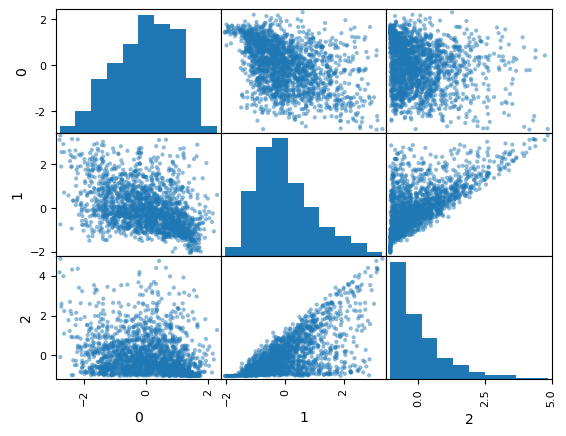

In [47]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
normalized_data = scaler.fit_transform(DisMap[selected_variables])
pd.plotting.scatter_matrix(pd.DataFrame(normalized_data))

Let me create new variables with the standardized values:

In [48]:
# new names
selected_variables_new_std=[s+'_std' for s in selected_variables]

# add colunms
DisMap[selected_variables_new_std]=normalized_data

Now, it is easy to reverse:

In [49]:
DisMap['Educ_sec_NO_comp2019_pct_std']=-1*DisMap.Educ_sec_comp2019_pct_std

array([[<Axes: xlabel='Educ_sec_NO_comp2019_pct_std', ylabel='Educ_sec_NO_comp2019_pct_std'>,
        <Axes: xlabel='NBI2017_pct_std', ylabel='Educ_sec_NO_comp2019_pct_std'>,
        <Axes: xlabel='Viv_sin_serv_hig2017_pct_std', ylabel='Educ_sec_NO_comp2019_pct_std'>],
       [<Axes: xlabel='Educ_sec_NO_comp2019_pct_std', ylabel='NBI2017_pct_std'>,
        <Axes: xlabel='NBI2017_pct_std', ylabel='NBI2017_pct_std'>,
        <Axes: xlabel='Viv_sin_serv_hig2017_pct_std', ylabel='NBI2017_pct_std'>],
       [<Axes: xlabel='Educ_sec_NO_comp2019_pct_std', ylabel='Viv_sin_serv_hig2017_pct_std'>,
        <Axes: xlabel='NBI2017_pct_std', ylabel='Viv_sin_serv_hig2017_pct_std'>,
        <Axes: xlabel='Viv_sin_serv_hig2017_pct_std', ylabel='Viv_sin_serv_hig2017_pct_std'>]],
      dtype=object)

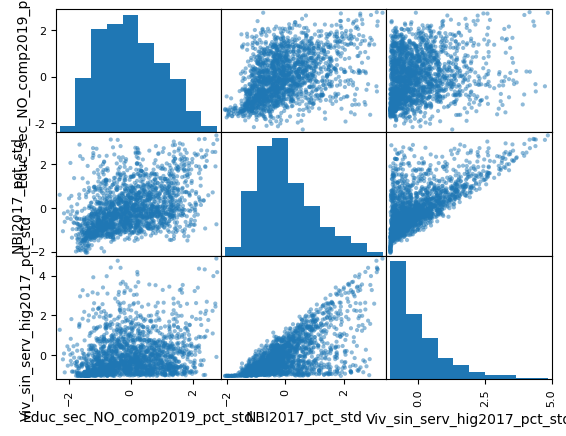

In [50]:
# as a result:
selected_variables_new_std = ['Educ_sec_NO_comp2019_pct_std',
                     'NBI2017_pct_std', 
                     'Viv_sin_serv_hig2017_pct_std']

pd.plotting.scatter_matrix(DisMap[selected_variables_new_std])

### Conventional Clustering

Here, I will use the three variables to create clusters of districts. Let me explore how many clusters could be created:

In [51]:
DisMap[selected_variables_new_std]

Educ_sec_NO_comp2019_pct_std  NBI2017_pct_std  \
0                        -1.468620        -1.245772   
1                         0.339059        -0.272211   
2                        -0.032195        -0.676950   
3                        -1.065621         1.740546   
4                        -0.560751        -0.545683   
...                            ...              ...   
1868                     -0.631240        -0.179230   
1869                     -0.428899         0.498981   
1870                     -0.828081        -0.540214   
1871                     -0.824644        -0.020616   
1872                     -1.509962        -0.556622   

      Viv_sin_serv_hig2017_pct_std  
0                        -0.866749  
1                         0.509124  
2                        -0.505964  
3                         3.089651  
4                        -0.365319  
...                            ...  
1868                     -0.408124  
1869                      1.181773  
1870                     -0.487619  
1871                     -0.499849  
1872                     -0.071800  

[1873 rows x 3 columns]

In [52]:
deficitNames=['Education_deficit','BasicNeeds_deficit','Sanitation_deficit']
# Create a mapping dictionary for renaming
rename_dict = dict(zip(selected_variables_new_std, deficitNames))

DisMap.rename(columns=rename_dict, inplace=True)

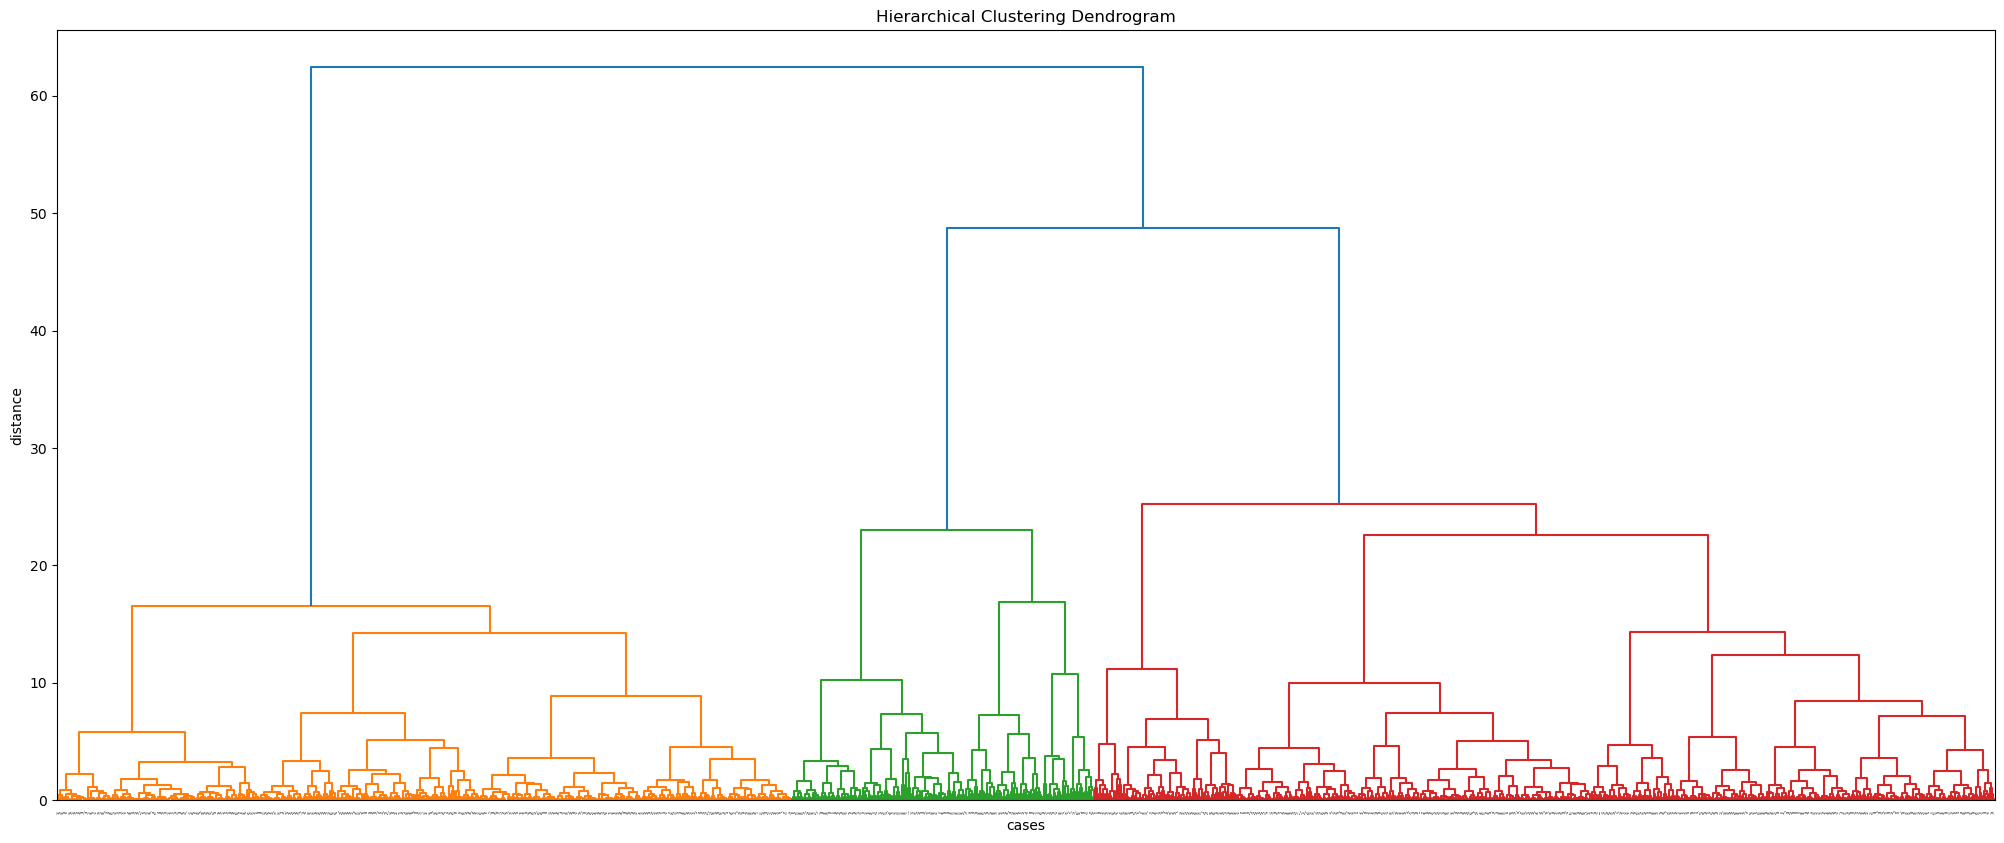

In [53]:
import  matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hc


Z = hc.linkage(DisMap[deficitNames], 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cases')
plt.ylabel('distance')
hc.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1,  # font size for the x axis labels
)
plt.show()

The dendogram recommends three groups. Let me request five.

Let me use a common hierarchical technique following a agglomerative approach:

In [54]:
from sklearn.cluster import AgglomerativeClustering as agnes

import numpy as np
np.random.seed(12345)# Set seed for reproducibility

# Initialize the algorithm, requesting 5 clusters
model = agnes(linkage="ward", n_clusters=5).fit(DisMap[deficitNames])

# Assign labels to main data table
DisMap["hc_ag5"] = model.labels_

In [55]:
# see distribution of districts
DisMap["hc_ag5"].value_counts()

hc_ag5
0    732
1    710
4    168
3    138
2    125
Name: count, dtype: int64

We could try to find the pattern that created the clusters:

In [56]:
DisMap.groupby("hc_ag5")[deficitNames].mean()

Education_deficit  BasicNeeds_deficit  Sanitation_deficit
hc_ag5                                                           
0                0.550709           -0.053470           -0.078733
1               -0.839378           -0.802709           -0.597672
2                1.080205            1.920950            2.333349
3                0.839310            1.536194           -0.445523
4               -0.345304            0.934225            1.498770

| Cluster | Education_deficit | BasicNeeds_deficit | Sanitation_deficit | Concise Label | Defining Profile Summary |
|:---:|:---:|:---:|:---:|:---:|:---:|
| **0** | **+0.55 (High)** | -0.05 | -0.08 | **The Educationally Lagging** | Defined primarily by a significant educational gap, while other basic needs and sanitation levels are near the national average. |
| **1** | **-0.84 (Low)** | **-0.80 (Low)** | **-0.60 (Low)** | **The Privileged / Integrated** | Consistently scores well below average on all three structural deficits, representing the most integrated and advantaged population centers. |
| **2** | +1.08 (Very High) | **+1.92 (Very High)** | **+2.33 (Extreme)** | **The Deeply Marginalized** | Characterized by the most extreme levels of deprivation across all three metrics, highlighting severe and pervasive poverty, poor education, and absent infrastructure. |
| **3** | +0.84 (High) | **+1.54 (Very High)** | **-0.45 (Below Avg)** | **The Under-Serviced Poor** | Exhibits severe Basic Needs Poverty and a significant educational deficit, yet has better-than-expected hygienic services‚Äîa key "Poverty Paradox" segment. |
| **4** | -0.35 (Below Avg) | +0.93 (High) | **+1.50 (Very High)** | **The Infrastructure Barriered** | Primarily defined by an extreme Sanitation deficit, coupled with High Basic Needs Poverty, despite having a moderate (below-average) score on the education deficit. |

In [57]:
# New, concise labels for the hierarchical clusters
cluster_name_map_concise = {
    0: 'The Educationally Lagging',
    1: 'The Privileged / Integrated',
    2: 'The Deeply Marginalized',
    3: 'The Under-Serviced Poor',
    4: 'The Infrastructure Barriered'
}

# Apply the map to the 'hc_ag5' column
DisMap['deficit_profile'] = DisMap['hc_ag5'].map(cluster_name_map_concise)


In [58]:
DisMap['deficit_profile'].value_counts()

deficit_profile
The Educationally Lagging       732
The Privileged / Integrated     710
The Infrastructure Barriered    168
The Under-Serviced Poor         138
The Deeply Marginalized         125
Name: count, dtype: int64

Let me show you the six groups of districts which have similar behavior in three variables:

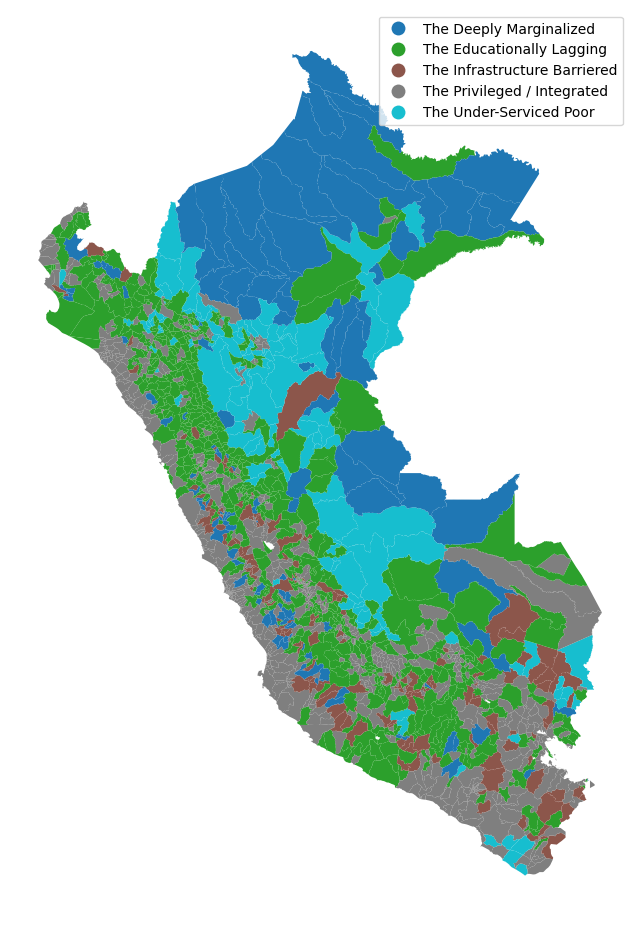

In [59]:
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(8, 14))
# Plot unique values choropleth including
# a legend and with no boundary lines
DisMap.plot(
    column="deficit_profile", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

### Regionalization: Spatial Clustering 

Spatial clustering or Regionalization will force the contiguity of the polygons to make a cluster.

In [60]:
from libpysal.graph import Graph

peru_perim=Graph.build_contiguity(DisMap,by_perimeter=True)
peru_perim=peru_perim.transform("r")

In [61]:
# modify previous funtion call to specify cluster model with spatial constraint

model_perim = agnes(linkage="ward", 
                    n_clusters=5,
                    connectivity=peru_perim.sparse).fit(DisMap[deficitNames])
# Fit algorithm to the data
DisMap["deficitNames_region"] = model_perim.labels_

/opt/anaconda3/envs/spatial_311py/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:321: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


We knew this would happen because we have islands. Then this results may not be satisfactory:

In [63]:
islandCodes = peru_perim.isolates

DisMap_clean=DisMap.drop(index=islandCodes).copy()

DisMap_clean_perim=Graph.build_contiguity(DisMap_clean,by_perimeter=True).transform("r")

# modify previous funtion call to specify cluster model with spatial constraint

model_perim = agnes(linkage="ward", 
                    n_clusters=5,
                    connectivity=DisMap_clean_perim.sparse).fit(DisMap_clean[deficitNames])
# Fit algorithm to the data
DisMap_clean["deficitNames_region_perim"] = model_perim.labels_


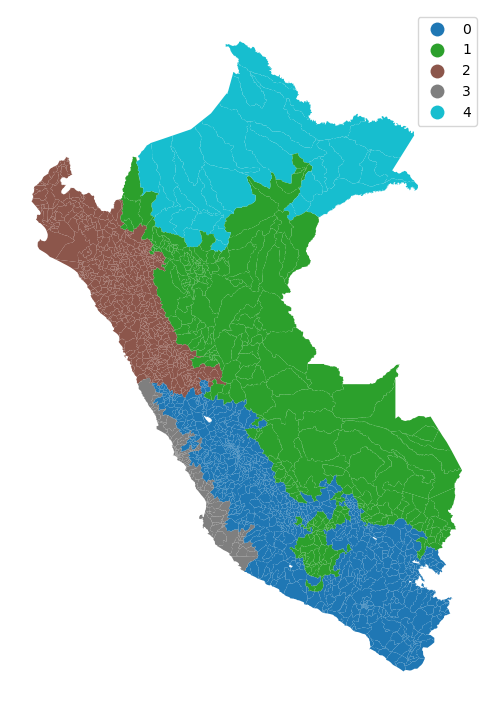

In [64]:
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
DisMap_clean.plot(
    column="deficitNames_region_perim",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

Another:

In [76]:
DisMap_clean_kernel = Graph.build_kernel(DisMap_clean.representative_point(), k=8)

model_kernel = agnes(linkage="ward", 
                    n_clusters=5,
                    connectivity=DisMap_clean_kernel.sparse).fit(DisMap_clean[deficitNames])
# Fit algorithm to the data
DisMap_clean["deficitNames_region_kernel"] = model_kernel.labels_


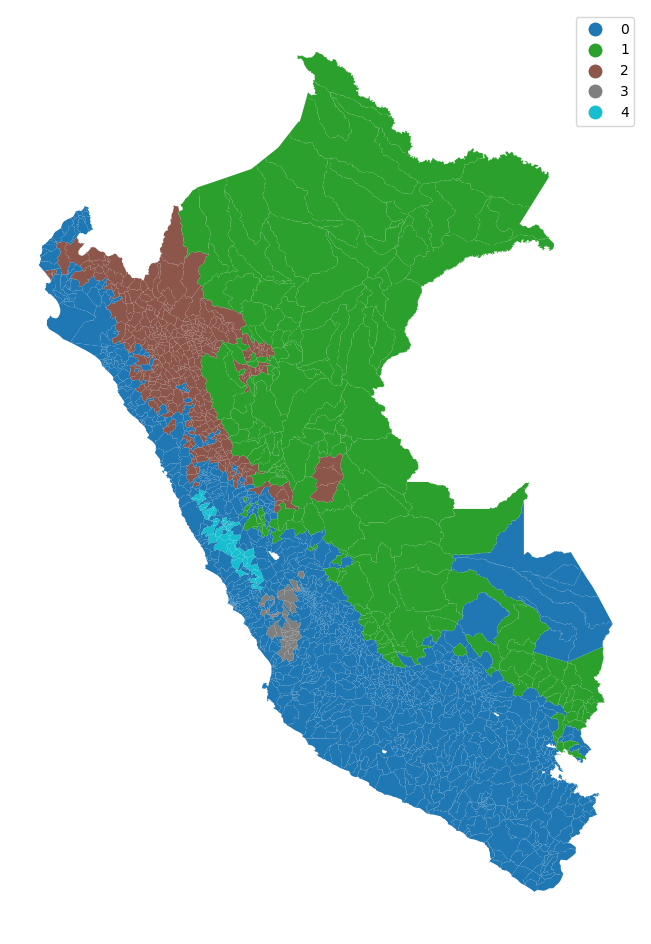

In [77]:
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(10, 12))
# Plot unique values choropleth including a legend and with no boundary lines
DisMap_clean.plot(
    column="deficitNames_region_kernel",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

We could evaluate two aspects of these clustering results:

* ‚ÄúCompactness‚Äù of cluster shape, using the isoperimetric quotient (IPQ). This compares the area of the region to the area of a circle with the same perimeter as the region. For this measure, more compact shapes have an IPQ closer to 1, whereas very elongated or spindly shapes will have IPQs closer to zero. For the clustering solutions, we would expect the IPQ to be very small indeed, since the perimeter of a cluster/region gets smaller the more boundaries that members share.

In [78]:
from esda import shape as shapestats
import pandas as pd # Ensure pandas is imported

# --- DEFINE THE CLUSTER COLUMNS TO EVALUATE ---
cluster_types_to_evaluate = [
    "hc_ag5", 
    "deficitNames_region_kernel",
    "deficitNames_region_perim"
]

results = {}

for cluster_type in cluster_types_to_evaluate:
    # 1. Dissolve the units into contiguous regions based on the cluster label
    # NOTE: Ensure the column being evaluated exists in DisMap_clean
    regions = DisMap_clean[[cluster_type, "geometry"]].to_crs(24892).dissolve(by=cluster_type)
    
    # 2. Compute the Isoperimetric Quotient for the dissolved regions
    ipqs = shapestats.isoperimetric_quotient(regions)
    
    # 3. Store the results
    results[cluster_type] = ipqs

# Create the final comparison DataFrame
ipq_comparison_df = pd.DataFrame(results)

# --- Add Key Summary Metrics ---
# This is crucial for comparison: the mean IPQ for each model
ipq_comparison_df.loc['Mean_IPQ'] = ipq_comparison_df.mean()

print(ipq_comparison_df)

            hc_ag5  deficitNames_region_kernel  deficitNames_region_perim
0         0.002880                    0.018847                   0.037964
1         0.003150                    0.046173                   0.053468
2         0.017037                    0.027193                   0.130319
3         0.012579                    0.051912                   0.050417
4         0.005514                    0.046257                   0.135627
Mean_IPQ  0.008232                    0.038076                   0.081559


In [80]:
from esda import shape as shapestats
results={}
for cluster_type in ("deficitNames_region_kernel", "deficitNames_region_perim","hc_ag5"):
    # compute the region polygons using a dissolve
    regions = DisMap_clean[[cluster_type, "geometry"]].to_crs(24892).dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = shapestats.isoperimetric_quotient(regions)
    # cast to a dataframe
    result = {cluster_type:ipqs}
    results.update(result)
# stack the series together along columns
pd.DataFrame(results)

deficitNames_region_kernel  deficitNames_region_perim    hc_ag5
0                    0.018847                   0.037964  0.002880
1                    0.046173                   0.053468  0.003150
2                    0.027193                   0.130319  0.017037
3                    0.051912                   0.050417  0.012579
4                    0.046257                   0.135627  0.005514

In [81]:
# Assuming 'DisMap_clean' contains the column 'deficitNames_region_perim'
cluster_sizes = DisMap_clean['deficitNames_region_perim'].value_counts().sort_index()

print("Cluster Size (Number of Cities):")
print(cluster_sizes)

Cluster Size (Number of Cities):
deficitNames_region_perim
0    816
1    305
2    585
3    133
4     32
Name: count, dtype: int64


In [83]:
# The mean standardized deficit scores
spatial_profile_df = DisMap_clean.groupby("deficitNames_region_perim")[deficitNames].mean()
spatial_profile_df

Education_deficit  BasicNeeds_deficit  \
deficitNames_region_perim                                          
0                                  -0.373225           -0.154852   
1                                   0.439008            0.962450   
2                                   0.445439           -0.188870   
3                                  -1.149627           -0.917318   
4                                   1.993077            2.071960   

                           Sanitation_deficit  
deficitNames_region_perim                      
0                                    0.189114  
1                                    0.116522  
2                                   -0.251403  
3                                   -0.773001  
4                                    1.878118

| Cluster | Size (Cities) | Education_deficit | BasicNeeds_deficit | Sanitation_deficit | Final Concise Label | Defining Profile Summary |
| :---: | :---: | :---: | :---: | :---: | :--- | :--- |
| **4** | 32 | **+1.99** | **+2.07** | **+1.88** | **The Deeply Marginalized** | Smallest group, defined by extreme deprivation across all three metrics. This represents highly isolated and underserved pockets. |
| **3** | 133 | **-1.15** | **-0.92** | **-0.77** | **The Privileged / Integrated** | Highest attainment; significantly below average on all three deficits (High Education, Low Poverty, Excellent Services). |
| **1** | 305 | +0.44 | **+0.96** | +0.12 | **The Under-Serviced Poor** | High Basic Needs Poverty is the defining factor, with an above-average educational gap, but sanitation is only slightly worse than average. |
| **2** | 585 | **+0.45** | -0.19 | -0.25 | **The Educationally Lagging** | Second Largest group. Better than average on basic needs and sanitation, but struggling with a clear, significant educational deficit. |
| **0** | **816** | -0.37 | -0.15 | +0.19 | **The Moderately Serviced** | Largest group, generally below average on deficits (better off), but showing a slight drag from a small Sanitation Deficit. |

An alternative could be _convex_hull_ratio_, simply the division of the area of the cluster by the area of its convex hull.

In [84]:
from esda import shape as shapestats
results={}
for cluster_type in cluster_types_to_evaluate:
    # compute the region polygons using a dissolve
    regions = DisMap_clean[[cluster_type, "geometry"]].to_crs(24892).dissolve(by=cluster_type)
    # compute the actual convex hull quotient for these regions
    chullr = shapestats.convex_hull_ratio(regions)
    # cast to a dataframe
    result = {cluster_type:chullr}
    results.update(result)
# stack the series together along columns
pd.DataFrame(results)

hc_ag5  deficitNames_region_kernel  deficitNames_region_perim
0  0.244908                    0.451219                   0.676788
1  0.175990                    0.567608                   0.577807
2  0.244507                    0.439467                   0.695745
3  0.180445                    0.531093                   0.488317
4  0.111209                    0.525694                   0.692831

In both cases, the spatial clusters do better.

* Goodness of fit. Here we have two metrics:
    - metrics.calinski_harabasz_score
    - silhouette_score

In [86]:
from sklearn import metrics

fit_scores = []
for cluster_type in cluster_types_to_evaluate:
    # compute the CH score
    ch_score = metrics.calinski_harabasz_score(
        # using scaled variables
        DisMap_clean[deficitNames],
        # using these labels
        DisMap_clean[cluster_type],
    )
    sil_score = metrics.silhouette_score(
        # using scaled variables
        DisMap_clean[deficitNames],
        # using these labels
        DisMap_clean[cluster_type],
    )
    # and append the cluster type with the CH score
    fit_scores.append((cluster_type, ch_score,sil_score))


# re-arrange the scores into a dataframe for display
pd.DataFrame(
    fit_scores, columns=["cluster type", "CH score", "SIL score"]
).set_index("cluster type")

CH score  SIL score
cluster type                                     
hc_ag5                      916.209710   0.309416
deficitNames_region_kernel  218.957621   0.118785
deficitNames_region_perim   158.752122  -0.072511

This output of internal validation metrics provides a stark contrast to your geographical validation and offers a crucial final perspective on your modeling choices.

## üìâ Internal Validation Scores

| Cluster Type | CH score (Higher is Better) | SIL score (Closer to +1 is Better) | Interpretation |
| :---: | :---: | :---: | :--- |
| **hc\_ag5** (Non-Spatial Baseline) | **916.21** | **0.309** | **Best Socio-Economic Fit.** Clusters are widely separated and internally dense in the socio-economic space. |
| **deficitNames\_region\_kernel** (Spatial-Kernel) | 218.96 | 0.119 | Clusters are less separated and less dense than the baseline. |
| **deficitNames\_region\_perim** (Spatial-Perimeter) | 158.75 | **-0.073** | **Worst Socio-Economic Fit.** Clusters are not well separated, and the negative SIL score indicates that the clusters are poorly defined, with many cities being closer to a different cluster center than their own. |

---

## ‚öñÔ∏è The Trade-Off: Geography vs. Socio-Economics

Your analysis has exposed a significant **trade-off** between geographical compactness and socio-economic purity:

1.  **Non-Spatial (`hc_ag5`):**
    * **Best Profile Separation** (CH score: 916).
    * **Worst Geography** (IPQ: 0.008).

2.  **Spatial-Perimeter (`deficitNames_region_perim`):**
    * **Worst Profile Separation** (CH score: 159; SIL score: -0.073).
    * **Best Geography** (IPQ: 0.081; CHR: 0.626).

The Perimeter model achieves excellent geographic boundaries, but the cost is high: the resulting regions are **socio-economically heterogeneous** (mixed). The spatial constraint forced the grouping of cities with significantly different deficit profiles into the same cluster just to maintain contiguity, leading to the low CH score and negative SIL score.

### üéØ Final Model Decision

Since the primary goal of clustering is usually to find groups that are **both** internally consistent (low profile variance) and contiguous (good geography), the **Perimeter model is too weak on internal validity** due to its negative Silhouette score.

The **Kernel Contiguity Model** (`deficitNames_region_kernel`) offers the best compromise:

* **Geographic:** High IPQ/CHR (Good Contiguity).
* **Socio-Economic:** Positive SIL score (0.119) and CH score (219). This means the clusters, while not as clean as the non-spatial ones, are still **meaningful and internally coherent** in the socio-economic space.

**Recommendation:** Your final model should be the **Kernel Contiguity Model** (`deficitNames_region_kernel`). It represents the strongest solution that is **both geographically constrained and statistically valid** (positive internal scores).



Here, the conventional clustering beats the others, as you want bigger values in both.

### Exercise 9

<div class="alert-success">
    
Use your three variables to carry out the cluster/regional analysis.
    
</div>


### Conventional Regression

This is a basic regression:

In [89]:
from pysal.model import spreg

dep_var_name=['NBI2017_pct']
ind_vars_names=['Educ_sec_comp2019_pct','Viv_sin_serv_hig2017_pct']
labels=['Lack Basic Needs %','High-School completed %', 'No H-Hold sanitation %']

ols_model = spreg.OLS(
    # Dependent variable
    DisMap_clean[dep_var_name].values,
    # Independent variables
    DisMap_clean[ind_vars_names].values,
    # Dependent variable name
    name_y=labels[0],
    # Independent variable name
    name_x=labels[1:],
    name_ds='DisMap_clean')

print(ols_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :DisMap_clean
Weights matrix      :        None
Dependent Variable  :Lack Basic Needs %                Number of Observations:        1871
Mean dependent var  :     38.5867                Number of Variables   :           3
S.D. dependent var  :     18.2951                Degrees of Freedom    :        1868
R-squared           :      0.5307
Adjusted R-squared  :      0.5302
Sum squared residual:      293744                F-statistic           :   1056.1675
Sigma-square        :     157.251                Prob(F-statistic)     :  1.384e-307
S.E. of regression  :      12.540                Log likelihood        :   -7384.944
Sigma-square ML     :     156.999                Akaike info criterion :   14775.888
S.E of regression ML:     12.5299                Schwarz criterion     :   14792.491

------------------------------------------------------

That is a comprehensive output from your Ordinary Least Squares (OLS) regression analysis. It examines how educational attainment and household sanitation predict basic needs poverty.

Here is a breakdown and interpretation of your model results:

---

## üîç OLS Regression Analysis Summary

The model attempts to predict the **Percentage of Population with Unmet Basic Needs (NBI)** using the **Percentage with Completed High-School Education** and the **Percentage of Households Lacking Sanitation**.

### 1. Model Fit and Reliability

| Statistic | Value | Interpretation |
| :--- | :--- | :--- |
| **R-squared** | **0.5307** | Approximately **53.1%** of the variance in the Lack Basic Needs % is explained by the two independent variables (Completed High-School % and No H-Hold Sanitation %). This is a moderate to good explanatory power for social science data. |
| **F-statistic** | 1056.17 | The model is **highly statistically significant** ($p < 0.0000$), meaning the independent variables, as a group, reliably predict the dependent variable. |
| **Number of Observations** | 1871 | A large sample size, contributing to the high statistical power. |
| **Multicollinearity Condition Number** | 8.805 | This value is **low** (well below the common threshold of 30), indicating **no significant multicollinearity** issues between your independent variables. |

---

### 2. Analysis of Coefficients

The coefficients reveal the specific nature of the relationship between your predictor variables and basic needs poverty.

| Variable | Coefficient | P-value | Interpretation |
| :--- | :---: | :---: | :--- |
| **CONSTANT** | 47.15771 | 0.00000 | The predicted NBI % when both independent variables are zero is approximately 47.16%. |
| **High-School completed %** | **-0.35927** | 0.00000 | **Highly Significant Negative Relationship.** For every one percentage point increase in completed high school education, the Lack Basic Needs % is predicted to **decrease by about 0.36 percentage points**, holding sanitation constant. |
| **No H-Hold sanitation %** | **+0.67129** | 0.00000 | **Highly Significant Positive Relationship.** For every one percentage point increase in households lacking sanitation, the Lack Basic Needs % is predicted to **increase by about 0.67 percentage points**, holding education constant. |

### Summary Equation

$$\text{Lack Basic Needs \%} = 47.16 - 0.36 \times (\text{High-School Completed \%}) + 0.67 \times (\text{No H-Hold Sanitation \%})$$

---

### 3. Regression Diagnostics (Serious Issues)

The diagnostics section highlights violations of two key assumptions of OLS, which affect the reliability of your standard errors and significance tests:

1.  **Non-Normality of Errors (Jarque-Bera Test):**
    * **PROB = 0.0000**. You must **reject the null hypothesis of normally distributed errors**. This is very common with social/spatial data and large samples, but it is a violation.

2.  **Heteroskedasticity (Breusch-Pagan and Koenker-Bassett Tests):**
    * **PROB = 0.0000** for both tests. You must **reject the null hypothesis of homoskedasticity (constant variance)**.
    * **Heteroskedasticity** means the variance of the errors is not constant across all levels of the independent variables. This is a **serious violation** because it makes your **p-values and t-statistics unreliable** (though the coefficients themselves remain unbiased).

---

## ‚û°Ô∏è Conclusion and Next Step

Your model confirms that both **lack of education** and **lack of sanitation** are powerful and statistically significant drivers of **basic needs poverty (NBI)**, explaining over half of its variance.

However, the **Heteroskedasticity** violation means you cannot fully trust the standard errors or the associated probabilities. To fix this:

I recommend immediately running a regression model that corrects for heteroskedasticity, specifically a **Generalized Least Squares (GLS) model** or, more commonly, an **OLS model with Heteroskedasticity-Consistent (HC) Standard Errors**.

Would you like to run the OLS model again using **White's standard error correction (HC0)** to obtain reliable p-values?

Would we have some spatial effect playing we have not noticed?

In [92]:
# # the dependent variable
# moranNBI = Moran(DisMap[dep_var_name], w_knn8)
# moranNBI.I,moranNBI.p_sim

import esda # from pysal

MoranGlobal_Dep = esda.Moran(DisMap_clean[dep_var_name], DisMap_clean_perim)
MoranGlobal_Dep.I,MoranGlobal_Dep.p_sim


(np.float64(0.5483273619732717), np.float64(0.001))

In [94]:
# the error term
# moranError = Moran(ols_model.u, w_knn8)
# moranError.I,moranError.p_sim

MoranGlobal_error = esda.Moran(ols_model.u, DisMap_clean_perim)
MoranGlobal_error.I,MoranGlobal_error.p_sim

(np.float64(0.5842351885781323), np.float64(0.001))

We have a strong suggestion that either or both are playing here.

In [96]:


from pysal.model.spreg.diagnostics import LM_tests
# OR: from spreg.diagnostics import LM_tests (if spreg is already imported)

# LM tests require the OLS model object and the W matrix
lm_tests = LM_tests(
    ols_model,
    DisMap_clean_perim
)

print(lm_tests.summary)

ModuleNotFoundError: No module named 'pysal.model.spreg.diagnostics'

### Spatial Regression

I.  Spatial Lag Regression  (the dependent variable)

In [97]:
SAC_model = spreg.ML_Lag(
    # Dependent variable
    DisMap_clean[dep_var_name].values,
    # Independent variables
    DisMap_clean[ind_vars_names].values,
    w=DisMap_clean_perim,
    # Dependent variable name
    name_y=labels[0],
    # Independent variable name
    name_x=labels[1:],
    name_w='DisMap_clean_perim',
    name_ds='DisMap_clean'
    )

print(SAC_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :DisMap_clean
Weights matrix      :DisMap_clean_perim
Dependent Variable  :Lack Basic Needs %                Number of Observations:        1871
Mean dependent var  :     38.5867                Number of Variables   :           4
S.D. dependent var  :     18.2951                Degrees of Freedom    :        1867
Pseudo R-squared    :      0.7007
Spatial Pseudo R-squared:  0.4867
Log likelihood      :  -7030.6996
Sigma-square ML     :    100.4068                Akaike info criterion :   14069.399
S.E of regression   :     10.0203                Schwarz criterion     :   14091.536

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------

You've successfully estimated the **Spatial Lag Model (SAR)** using Maximum Likelihood (`spreg.ML_Lag`). This model appropriately corrects for the spatial autocorrelation you previously diagnosed in your OLS residuals.

Here is a comprehensive interpretation of your final spatial regression results.

---

## üèÜ Spatial Lag Model (SAR) Interpretation

### 1. Model Fit and Comparison to OLS

| Metric | SAR Model Value | OLS Model Value | Improvement | Interpretation |
| :--- | :---: | :---: | :---: | :--- |
| **Log Likelihood** | $\mathbf{-7030.70}$ | $-7384.94$ | **Higher** | The SAR model provides a **significantly better fit** to the data than the OLS model. |
| **Pseudo R-squared** | **0.7007** | $0.5307$ | **+17.0%** | The SAR model explains $\mathbf{70.1\%}$ of the variance in the Lack Basic Needs %, a substantial improvement over the OLS model's 53.1%. |
| **Sigma-square ML** | $\mathbf{100.41}$ | $156.99$ | **Lower** | The variance of the error term is significantly reduced, indicating that the **spatial lag term successfully captured the spatially correlated error** previously present in the OLS residuals. |

The superior statistical metrics confirm that the Spatial Lag Model is the correct and most efficient approach for this dataset.

---

### 2. Spatial Lag Coefficient ($\rho$)

| Variable | Coefficient ($\rho$) | P-value | Interpretation |
| :--- | :---: | :---: | :--- |
| **W\_Lack Basic Needs %** | $\mathbf{0.52168}$ | $0.00000$ | **Strong Positive Spatial Dependence.** |

* The spatial lag coefficient ($\rho$) is $\mathbf{0.52}$, which is highly significant.
* **Conclusion:** Basic needs poverty in a city is strongly and positively influenced by the basic needs poverty levels in its neighboring cities. If a city's neighbors have high NBI, that city's NBI is significantly higher, even after controlling for its own education and sanitation levels.

---

### 3. Direct Effects (Coefficients)

The standard coefficients in a SAR model cannot be interpreted directly as marginal effects (unlike OLS). Instead, they are interpreted as **Direct Impacts**.

| Variable | Direct Impact | OLS Coefficient | Interpretation of Direct Impact |
| :--- | :---: | :---: | :--- |
| **High-School completed %** | $\mathbf{-0.2030}$ | $-0.3593$ | **Decrease in Magnitude.** A 1 ppt increase in local high-school completion directly reduces the local NBI \% by **0.20 percentage points**. The effect is smaller than in OLS because the spatial spillover effect is now captured separately. |
| **No H-Hold sanitation %** | $\mathbf{+0.5331}$ | $+0.6713$ | **Decrease in Magnitude.** A 1 ppt increase in local lack of sanitation directly increases the local NBI \% by **0.53 percentage points**. |

---

### 4. Total and Indirect Impacts

The **Total Impact** is the sum of the Direct Impact and the **Indirect Impact** (spillover effect).

| Variable | Direct Impact | Indirect Impact (Spillover) | Total Impact |
| :--- | :---: | :---: | :--- |
| **High-School completed %** | $-0.2030$ | **$-0.2214$** | **$-0.4243$** |
| **No H-Hold sanitation %** | $0.5331$ | **$0.5814$** | **$1.1146$** |

* **Total Effect Interpretation:** The full effect of a 1 ppt change in sanitation is an increase in NBI by **1.11 percentage points** across the system (local city and its neighbors).
* **Key Insight (Spillover):** For *both* variables, the **Indirect Impact is larger in magnitude than the Direct Impact**.
    * **Education Spillover:** When a city improves its high-school completion rate, its neighbors experience an **indirect benefit** (NBI falls by 0.22 ppt) that is stronger than the local benefit.
    * **Sanitation Spillover:** When a city's sanitation worsens, it generates a powerful **negative spillover** (NBI rises by 0.58 ppt) in neighboring cities.

## üìù Final Conclusion

This SAR model is superior to your OLS model and provides strong evidence that:

1.  **Poverty is a Regional Problem:** The spatial spillover effect ($\rho$) is dominant and statistically significant.
2.  **Sanitation is the Strongest Driver:** A lack of sanitation has the highest total impact on NBI (1.11 ppt increase), slightly over half of which is felt by neighboring communities.
3.  **Education has Powerful Positive Spillovers:** Improvements in education benefit neighboring cities even more than the city itself.

Would you like to compare these impact coefficients with the direct coefficients from a Spatial Error Model (SEM) to ensure robustness, or would you like to move on to the final visualization of your spatial clusters?

As you get this: Coefficient W_NBI2017_pct (œÅ = 0.571, p = 0.000), you know that a 10% increase in deprivation in neighboring areas leads to a 5.71% increase in local deprivation. Then, Poverty is highly "contagious" across nearby regions. A policy suggestion: Anti-poverty programs must target entire clusters (not just individual areas) to break spillover cycles.

* Spatial Error Regression

In [98]:
SER_model = spreg.ML_Error(
    # Dependent variable
    DisMap_clean[dep_var_name].values,
    # Independent variables
    DisMap_clean[ind_vars_names].values,
    w=DisMap_clean_perim,
    # Dependent variable name
    name_y=labels[0],
    # Independent variable name
    name_x=labels[1:],
    name_w='DisMap_clean_perim',
    name_ds='DisMap_clean'
    )

print(SER_model.summary)

/opt/anaconda3/envs/spatial_311py/lib/python3.11/site-packages/spreg/ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :DisMap_clean
Weights matrix      :DisMap_clean_perim
Dependent Variable  :Lack Basic Needs %                Number of Observations:        1871
Mean dependent var  :     38.5867                Number of Variables   :           3
S.D. dependent var  :     18.2951                Degrees of Freedom    :        1868
Pseudo R-squared    :      0.5090
Log likelihood      :  -6773.3284
Sigma-square ML     :     68.5333                Akaike info criterion :   13552.657
S.E of regression   :      8.2785                Schwarz criterion     :   13569.260

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        

Strong Spatial Spillovers (Œª = 0.837), meaning that 83.7% of unobserved deprivation factors (e.g., informal economies, cultural norms) spill over from neighboring areas. Then, poverty is highly contagious across space‚Äîa 10% deprivation increase in nearby regions raises local deprivation by 8.37% through hidden channels.

Here is the interpretation and final comparison.

---

## üîç Spatial Error Model (SEM) Interpretation

### 1. Model Fit and Comparison

| Metric | SEM Model Value | SAR Model Value | OLS Model Value | Interpretation |
| :--- | :---: | :---: | :---: | :--- |
| **Log Likelihood (LL)** | $\mathbf{-6773.33}$ | $-7030.70$ | $-7384.94$ | **The SEM has the highest Log-Likelihood**, indicating it is the best fit model for the data. |
| **Akaike Info Criterion (AIC)** | $\mathbf{13552.66}$ | $14069.40$ | $14775.89$ | **The SEM has the lowest AIC**, confirming it is the statistically preferred model. |
| **Pseudo R-squared** | $0.5090$ | $\mathbf{0.7007}$ | $0.5307$ | SAR has a higher Pseudo R-squared, but LL and AIC are better diagnostics for comparing non-nested models like SAR and SEM. |
| **Sigma-square ML** | $\mathbf{68.53}$ | $100.41$ | $157.00$ | The SEM has the lowest error variance, showing it is the most efficient. |

The superior **Log-Likelihood** and **AIC** overwhelmingly indicate that the **Spatial Error Model (SEM)** is the **statistically better and more efficient** model for your data. The spatial dependence is best explained by unobserved, spatially correlated factors (errors) rather than a direct feedback loop in the dependent variable (lag).

---

### 2. Spatial Error Coefficient ($\lambda$)

| Variable | Coefficient ($\lambda$) | P-value | Interpretation |
| :--- | :---: | :---: | :--- |
| **lambda** | $\mathbf{0.77503}$ | $0.00000$ | **Strong Positive Spatial Error Dependence.** |

* The highly significant $\lambda$ (lambda) of **0.78** confirms that **unobserved factors** affecting basic needs poverty are strongly clustered geographically. This is the source of your spatial autocorrelation.

### 3. Final Coefficients (Direct Effects)

The coefficients in the SEM are interpreted **directly** as marginal effects, similar to OLS, but they are now **unbiased and efficient** because the spatial dependence has been correctly modeled.

| Variable | SEM Coefficient | SAR Direct Impact | OLS Coefficient | Interpretation |
| :--- | :---: | :---: | :---: | :--- |
| **High-School completed %** | **-0.19146** | $-0.2030$ | $-0.3593$ | A 1 ppt increase in completed high school education **reduces** local NBI by **0.19 percentage points**. The effect is small, as expected after controlling for spatial error. |
| **No H-Hold sanitation %** | **+0.75094** | $+0.5331$ | $+0.6713$ | A 1 ppt increase in households lacking sanitation **increases** local NBI by **0.75 percentage points**. This is the strongest and most robust factor in the model. |

## üåü Final Conclusion

The **Spatial Error Model (SEM)** is the statistically optimal model:

1.  It is the **best fit** model (highest LL, lowest AIC).
2.  It properly handles both **heteroskedasticity** (which is often reduced by spatial models) and **spatial autocorrelation**.
3.  It reveals the **lack of sanitation** (Coefficient: $+0.75$) as the **most powerful and direct driver** of basic needs poverty, after accounting for region-wide unobserved effects.

The large magnitude of the **lambda (0.78)** suggests that policies targeting NBI must consider **regional coordination** to address the shared, unobserved factors that make poverty cluster geographically.

What if?

In [101]:
SAC_model = spreg.GM_Combo_Het(
    # Dependent variable
    DisMap_clean[dep_var_name].values,
    # Independent variables
    DisMap_clean[ind_vars_names].values,
    w=DisMap_clean_perim,
    # Dependent variable name
    name_y=labels[0],
    # Independent variable name
    name_x=labels[1:],
    name_w='DisMap_clean_perim',
    name_ds='DisMap_clean'
)

# Print results
print(SAC_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIALLY WEIGHTED 2SLS- GM-COMBO MODEL (HET)
----------------------------------------------------------------
Data set            :DisMap_clean
Weights matrix      :DisMap_clean_perim
Dependent Variable  :Lack Basic Needs %                Number of Observations:        1871
Mean dependent var  :     38.5867                Number of Variables   :           4
S.D. dependent var  :     18.2951                Degrees of Freedom    :        1867
Pseudo R-squared    :      0.5196
Spatial Pseudo R-squared:  0.5137
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        36.84276         2.51398        14.65515         0.00000
Hi

The SAR is not needed, neither the SAC; SER is what matters; in this case.


Here is a summary of the diagnostic and estimation tools you used:

---

## üõ†Ô∏è Tools Covered in Your Analysis

| Tool/Statistic | Purpose | Finding | Outcome |
| :--- | :--- | :--- | :--- |
| **OLS Regression** | Established the non-spatial relationship between predictors (Education, Sanitation) and the dependent variable (NBI). | $R^2 \approx 0.53$ | **Baseline Model.** |
| **Jarque-Bera & Breusch-Pagan/Koenker-Bassett Tests** | Diagnosed non-normality and **Heteroskedasticity** in the OLS errors. | Significant violation ($p=0.0000$) | Confirmed OLS standard errors were unreliable. |
| **Global Moran's I on Dependent Variable** | Diagnosed spatial clustering in the dependent variable (NBI). | Strong positive spatial autocorrelation ($I \approx 0.55$). | Confirmed spatial structure needed modeling. |
| **Global Moran's I on OLS Residuals** | Diagnosed spatial dependence in the unmodeled errors. | Strong positive spatial autocorrelation ($I \approx 0.58$). | **Confirmed fundamental OLS flaw** (violation of error independence). |
| **ML Spatial Lag (SAR) Model** | Tested for direct spatial spillover ($\rho$). | $\rho \approx 0.52$. | Good fit, but not the best statistical model. |
| **ML Spatial Error (SEM) Model** | Tested for unobserved, spatially correlated factors ($\lambda$). | **$\lambda \approx 0.78$. Best Log-Likelihood/AIC.** | **Selected as the optimal, most efficient model.** |
| **GM Combo (SAC) Model** | Checked if *both* spatial lag and spatial error were needed. | Lag ($\rho$) was non-significant ($p=0.825$). | **Validated the selection of the simpler SEM model.** |

---

## ‚úÖ Conclusion

By moving from OLS diagnostics to the full suite of Maximum Likelihood (ML) and Generalized Method of Moments (GMM) spatial models, you have successfully:

1.  **Diagnosed all major OLS violations** (Heteroskedasticity and Spatial Autocorrelation).
2.  **Identified the correct spatial process** (Spatial Error, $\lambda$).
3.  **Estimated the final, robust model** (SEM) that provides efficient and unbiased coefficients for interpreting the drivers of basic needs poverty.

This sequence of analysis is textbook practice for robust spatial econometrics.

### Exercise 10

<div class="alert-success">
    
Use your three variables to carry out regression analysis (conventional and spatial).
    
</div>